## Load Data

In [1]:
"""Load Data
Structure:
    1. Imports, Variables, Functions
    2. Load Data
"""

# 1. Imports, Variables, Functions
# imports
import pandas as pd, numpy as np, os, sys
import anndata as ad
import logging
from typing import *
import pickle

logging.basicConfig(level=logging.INFO)

# variables
run_dir = os.path.join("..", "outputs", "run-24-09-01-01")


# functions


def load_run_output(input_dir: str) -> tuple:
    """Load the output of a run
    Args:
        input_dir (str): path to the run output directory
    Returns:
        loaded_variables (tuple): tuple of loaded variables
    """

    variables_to_load = [
        "predictions_test",
        "labels_test",
        "results_test",
        "all_outputs_test",
        "predictions_train",
        "labels_train",
        "results_train",
        "all_outputs_train",
        "adata_train",
        "adata_test",
        "id2type",
    ]

    # initialize loaded variables as an empty tuple
    loaded_variables = ()

    # loop through variables
    for variable in variables_to_load:
        if variable.startswith("adata"):
            loaded_variable = ad.read_h5ad(os.path.join(input_dir, f"{variable}.h5ad"))
        else:
            with open(os.path.join(input_dir, f"{variable}.pkl"), "rb") as f:
                loaded_variable = pickle.load(f)

        # add the loaded variable to the tuple
        loaded_variables += (loaded_variable,)

    print(f"Nº of loaded variables {len(loaded_variables)}")

    return loaded_variables


# 2. Load Data
(
    predictions_test,
    labels_test,
    results_test,
    all_outputs_test,
    predictions_train,
    labels_train,
    results_train,
    all_outputs_train,
    adata_train,
    adata_test,
    id2type,
) = load_run_output(run_dir)

Nº of loaded variables 11


In [9]:
adata_test.obs["disease"].value_counts()

disease
Systemic Lupus Erythematosus    37
Control                         31
Name: count, dtype: int64

In [2]:
len(all_outputs_test)

23

In [3]:
from typing import *


def merge_embeddings(output: List[Dict]) -> np.array:
    """Merge Embeddings
    Args:
        output (List[Dict]): List of dictionaries with embeddings
    Returns:
        np.array: Merged embeddings
    """
    for i in range(len(output)):
        embeddings_i = output[i]["cell_emb"].numpy()

        if i == 0:
            embeddings = embeddings_i
        else:
            embeddings = np.concatenate((embeddings, embeddings_i), axis=0)
    return embeddings


scgpt_emb_test = merge_embeddings(all_outputs_test)
logging.info(f"SCGPT Embeddings Test Shape: {scgpt_emb_test.shape}")

scgpt_emb_train = merge_embeddings(all_outputs_train)
logging.info(f"SCGPT Embeddings Train Shape: {scgpt_emb_train.shape}")

INFO:root:SCGPT Embeddings Test Shape: (68, 512)
INFO:root:SCGPT Embeddings Train Shape: (68, 512)


In [59]:
results_test

{'test/accuracy': 0.6244685876239963,
 'test/precision': 0.6968293822247987,
 'test/recall': 0.5313190629237032,
 'test/macro_f1': 0.5701623026462113}

In [60]:
np.isnan(adata_test.X[100]).sum()

6

In [61]:
# ! TODO: add this info to the dataframe before saving it

# map from DSA signature to diease type
dsa_2_disease = dict()
# Iterate over the rows in `adata_test.obs` to build the dictionary and add the mapping to the DataFrame
counter = 0
n_genes = list()
for index, row in adata_test.obs.iterrows():
    if row["celltype"] != "Control":
        dsa = row["ids"].split(";")[0]
        dsa_2_disease[dsa] = row["celltype"]

    # count nº of genes
    gene_counts = (~np.isnan(adata_test.X[counter])).sum()
    n_genes.append(gene_counts)
    counter += 1
# all dsa
dsa_ids = [id.split(";")[0] for id in adata_test.obs["ids"]]

# add disease_study
adata_test.obs["disease_study"] = [dsa_2_disease.get(dsa) for dsa in dsa_ids]
adata_test.obs["n_genes"] = n_genes

2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2995
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2984
2984
2984
2984
2939
2939
2939
2939
2939
2939
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2779
2779
2779
2779
2779
2779
2779
2779
2779
2779
2779
2990
2996
2996
2996
2996
2996
2996
2982
2982
2982
2982
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996


In [67]:
# map from DSA signature to diease type
dsa_2_disease = dict()
# Iterate over the rows in `adata_train.obs` to build the dictionary and add the mapping to the DataFrame
counter = 0
n_genes = list()
for index, row in adata_train.obs.iterrows():
    if row["celltype"] != "Control":
        dsa = row["ids"].split(";")[0]
        dsa_2_disease[dsa] = row["celltype"]

    # count nº of genes
    gene_counts = (~np.isnan(adata_train.X[counter])).sum()
    n_genes.append(gene_counts)
    counter += 1
# all dsa
dsa_ids = [id.split(";")[0] for id in adata_train.obs["ids"]]

# add disease_study
adata_train.obs["disease_study"] = [dsa_2_disease.get(dsa) for dsa in dsa_ids]
adata_train.obs["n_genes"] = n_genes

2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2995
2995
2996
2996
2995
2996
2994
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996
2996


In [74]:
diseases_of_interest_set = adata_test.obs["disease_study"].unique()

d_data = dict()
d_data["n_diseases"] = dict()
d_data["n_controls"] = dict()
d_data["n_datasets"] = dict()
d_data["n_genes"] = dict()
d_data["n_de_signatures"] = dict()


for disease in diseases_of_interest_set:
    # Nº Disease Samples
    states = adata_test.obs.query(f'disease_study == "{disease}"')["celltype"].to_list()
    n_diseases = len(states) - states.count("Control")
    logging.info(f"{disease} Nº of Diseases: {n_diseases}")

    # Nº of Control Samples
    n_controls = states.count("Control")
    logging.info(f"{disease} Nº Controls: {n_controls}")

    # Nº of Datasets
    datasets = adata_test.obs.query(f'disease_study == "{disease}"')[
        "dataset_id"
    ].to_list()
    n_datasets = len(set(datasets))
    logging.info(f"{disease} Nº of Datasets: {len(datasets)}")

    # Nº of Genes
    n_genes = adata_test.obs.query(f'disease_study == "{disease}"')["n_genes"].to_list()
    logging.info(
        f"{disease} Nº of Genes: {np.mean(n_genes):.0f} ± {np.std(n_genes):.0f}"
    )

    # Nº of DE signatures
    all_ids = adata_test.obs.query(f'disease_study == "{disease}"')["ids"].to_list()

    de_signatures = list(set([id.split(";")[0] for id in all_ids]))
    n_de_signatures = len(de_signatures)
    logging.info(f"{disease} Nº of DE Signatures: {n_de_signatures}")

    # append to dictionary
    d_data["n_diseases"][disease] = n_diseases
    d_data["n_controls"][disease] = n_controls
    d_data["n_datasets"][disease] = len(datasets)
    d_data["n_genes"][disease] = n_genes
    d_data["n_de_signatures"][disease] = n_de_signatures

INFO:root:Lung Adenocarcinoma Nº of Diseases: 67
INFO:root:Lung Adenocarcinoma Nº Controls: 60
INFO:root:Lung Adenocarcinoma Nº of Datasets: 127
INFO:root:Lung Adenocarcinoma Nº of Genes: 2972 ± 116
INFO:root:Lung Adenocarcinoma Nº of DE Signatures: 18
INFO:root:None Nº of Diseases: 0
INFO:root:None Nº Controls: 0
INFO:root:None Nº of Datasets: 0
/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/numpy/cor

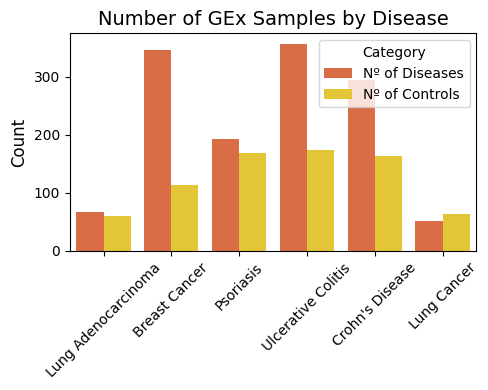

In [77]:
import seaborn as sns
from matplotlib import pyplot as plt

irb_colors = [
    "#ffd81cff",
    "#f6972dff",
    "#f2612dff",
    "#574270ff",
    "#00589bff",
    "#002f58ff",
]

labels = list(d_data["n_diseases"].keys())
n_controls = [d_data["n_controls"][x] for x in labels]
n_diseases = [d_data["n_diseases"][x] for x in labels]

df_plot = pd.DataFrame(
    {
        "Disease": labels,
        "Nº of Diseases": n_diseases,
        "Nº of Controls": n_controls,
    }
)

# Transform the DataFrame to long format
df_long = df_plot.melt(id_vars="Disease", var_name="Category", value_name="Count")

# Plotting with seaborn
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_long,
    x="Disease",
    y="Count",
    hue="Category",
    palette=[irb_colors[2], irb_colors[0]],
)

# Adding labels and title
plt.xlabel("", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of GEx Samples by Disease", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
# plt.savefig("outputs/n_samples.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_893746/3104471250.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_893746/3104471250.py:17: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(


Text(0.5, 1.0, 'Nº of Genes across Diseases')

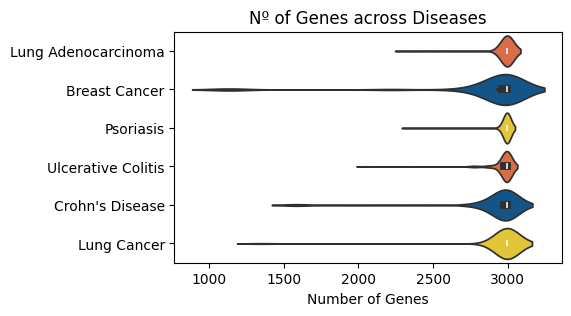

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming d_data is defined and contains the necessary data
labels = list(d_data["n_diseases"].keys())
n_genes = [d_data["n_genes"][x] for x in labels]

flat_genes = []
flat_labels = []
for label, genes_list in zip(labels, n_genes):
    flat_genes.extend(genes_list)
    flat_labels.extend([label] * len(genes_list))

plt.figure(figsize=(5, 3))

# Violin plot
sns.violinplot(
    x=flat_genes, y=flat_labels, palette=[irb_colors[2], irb_colors[4], irb_colors[0]]
)

# Adding titles and labels
plt.xlabel("Number of Genes")
plt.ylabel("")
plt.title("Nº of Genes across Diseases")
# plt.savefig("outputs/n_genes.png", dpi=300, bbox_inches="tight")

## Explore Embeddings

In [79]:
"""Explore Embeddings

Structure:
    1. Imports, Variables, Functions
    2. PCA Plots
    3. UMAP Plots
    4. Cosine Distance
    5. Pearson Correlation
    6. Euclidean Distance
"""

# 1. Imports, Variables, Functions
# imports
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap, to_rgba_array
from scipy.interpolate import make_interp_spline
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap, to_rgba_array
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# variables

irb_colors = [
    "#ffd81cff",
    "#f6972dff",
    "#f2612dff",
    "#574270ff",
    "#00589bff",
    "#002f58ff",
]

irb_colors = ["#ffb234", "#ff958e", "#ff6028", "#2779ff", "#022778"]


# functions
def plot_metrics(values, labels, metric, output_type="", save=True):

    assert metric in [
        "Cosine Distance",
        "Euclidean Distance",
        "Pearson Correlation",
    ], "Invalid metric"

    min_val = min([x for sublist in values for x in sublist])
    max_val = max([x for sublist in values for x in sublist])

    # change min max values
    if metric == "Cosine Distance":
        min_val = 0
        max_val = 2
    elif metric == "Pearson Correlation":
        min_val = -1
        max_val = 1

    # Get a color map
    cmap = plt.get_cmap("hsv")

    # Define unique colors
    colors = [cmap(i / len(labels)) for i in range(len(labels))]

    # Define bin range
    bin_range = np.arange(min_val, max_val + 0.01, (max_val - min_val) / 20)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(4, 4))

    for i, (v, l) in enumerate(zip(values, labels)):

        # Plot control vs control
        density, bins = np.histogram(
            v, bins=bin_range, density=True
        )  # Calculate the density
        bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Calculate the center of each bin
        ax.plot(
            bin_centers, density, "-", color=colors[i], label=l
        )  # Create the density plot

    # Set y-axis limit
    ax.set_ylim(0, np.max(density) * 1.1)

    # Set x-axis limit
    ax.set_xlim(min_val, max_val)

    # Add labels and title
    ax.set_xlabel(f"{metric}")
    ax.set_ylabel("Density")
    ax.set_title(f"Pairwise {metric} Distributions")

    # Add legend
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

    # Show grid
    ax.grid(True)

    # Show plot
    if save:
        plt.savefig(
            f"outputs/pairwise_{metric.lower().replace(' ', '_')}.scgpt.{output_type}.png",
            dpi=300,
            bbox_inches="tight",
        )


def get_pairwise_similarities(matrix, indexes_1, indexes_2=None):

    pairs = list()
    if indexes_2 is not None:

        for i in indexes_1:
            for j in indexes_2:
                pairs.append([i, j])

        pairs = np.array(pairs)
        return matrix[pairs[:, 0], pairs[:, 1]]

    else:
        for n, i in enumerate(indexes_1):
            for j in indexes_1[n + 1 :]:
                pairs.append([i, j])

        pairs = np.array(pairs)
        return matrix[pairs[:, 0], pairs[:, 1]]

### 2. UMAP Plots

In [100]:
import matplotlib.pyplot as plt
import umap
from mpl_toolkits.mplot3d import Axes3D

# Perform UMAP with 3 components
umap_model = umap.UMAP(n_components=3)
umap_embedding = umap_model.fit_transform(scgpt_emb_test)

Text(0.5, 0.92, '3D UMAP Representation\nDisease vs Control')

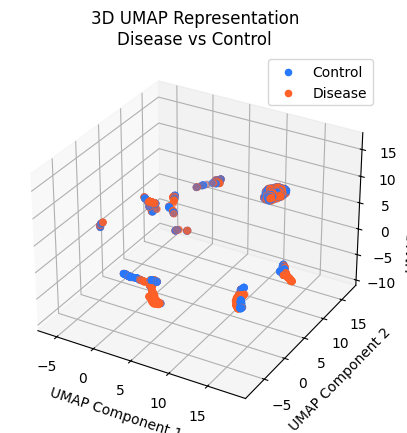

In [103]:
labels = [
    "Disease" if c != "Control" else "Control"
    for c in adata_test.obs["celltype"].to_list()
]

# Map labels to colors
label_color_map = {"Control": irb_colors[3], "Disease": irb_colors[2]}
colors = [label_color_map.get(label, "grey") for label in labels]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with colors
ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], umap_embedding[:, 2], c=colors)

# Adding legend
for label in label_color_map:
    ax.scatter([], [], [], c=label_color_map[label], label=label)
ax.legend()

# Set labels
ax.set_xlabel("UMAP Component 1")
ax.set_ylabel("UMAP Component 2")
ax.set_zlabel("UMAP Component 3")
ax.set_title("3D UMAP Representation\nDisease vs Control")

# Display the plot
# plt.savefig("outputs/umap_3d.scgpt.disease_control.png", dpi=300, bbox_inches="tight")

/tmp/ipykernel_893746/3868712869.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap(
/tmp/ipykernel_893746/3868712869.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], [], c=label_color_map[label], label=label)


Text(0.5, 0.92, '3D UMAP Representation\nDisease Types')

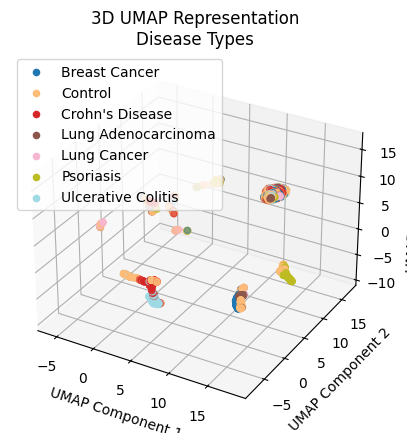

In [112]:
labels = adata_test.obs["celltype"].to_list()
unique_labels = list(set(labels))
unique_labels.sort()

# label_color_map = {
#     k: v
#     for k, v in zip(
#         unique_labels, [irb_colors[0], irb_colors[4], irb_colors[3], irb_colors[2]]
#     )
# }
# colors = [label_color_map.get(label, "grey") for label in labels]

# Generate a color map using matplotlib
colormap = plt.cm.get_cmap(
    "tab20", len(unique_labels)
)  # You can change "viridis" to any other colormap

# Map each label to a color
label_color_map = {label: colormap(i) for i, label in enumerate(unique_labels)}

colors = [label_color_map[label] for label in labels]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with colors
ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], umap_embedding[:, 2], c=colors)

# Adding legend
for label in label_color_map:
    ax.scatter([], [], [], c=label_color_map[label], label=label)
ax.legend()

# Set labels
ax.set_xlabel("UMAP Component 1")
ax.set_ylabel("UMAP Component 2")
ax.set_zlabel("UMAP Component 3")
ax.set_title("3D UMAP Representation\nDisease Types")

# Display the plot
# plt.savefig("outputs/umap_3d.scgpt.diseases.png", dpi=300, bbox_inches="tight")

In [114]:
labels = adata_test.obs["tissue"].to_list()

unique_labels = list(set(labels))

# Get a color map
cmap = plt.get_cmap("hsv")

# Generate a unique color for each unique label
colors = [cmap(i / len(unique_labels)) for i in range(len(unique_labels))]

# Create a mapping from unique labels to colors
label_color_map = {
    label: color for label, color in zip(unique_labels, colors) if str(label) != "nan"
}
label_color_map.update({"nan": (0.5, 0.5, 0.5, 1.0)})

# Map the labels to their corresponding colors
assigned_colors = list()
for label in labels:
    assigned_colors.append(label_color_map[label])

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with colors
ax.scatter(
    umap_embedding[:, 0], umap_embedding[:, 1], umap_embedding[:, 2], c=assigned_colors
)

# Adding legend
for label in label_color_map:
    ax.scatter([], [], [], c=label_color_map[label], label=label)
ax.legend(loc="upper right", bbox_to_anchor=(1.5, 1))

# Set labels
ax.set_xlabel("UMAP Component 1")
ax.set_ylabel("UMAP Component 2")
ax.set_zlabel("UMAP Component 3")
ax.set_title("3D UMAP Representation\nTissue Types")

# Display the plot
# plt.savefig("outputs/umap_3d.scgpt.tissue_types.png", dpi=300, bbox_inches="tight")

KeyError: 'tissue'

Text(0.5, 0.92, '3D UMAP Representation\nDataset')

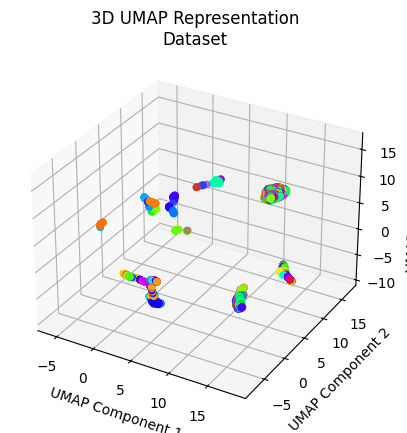

In [117]:
labels = adata_test.obs["dataset_id"].to_list()

unique_labels = list(set(labels))

# Get a color map
cmap = plt.get_cmap("hsv")

# Generate a unique color for each unique label
colors = [cmap(i / len(unique_labels)) for i in range(len(unique_labels))]

# Create a mapping from unique labels to colors
label_color_map = {
    label: color for label, color in zip(unique_labels, colors) if str(label) != "nan"
}
label_color_map.update({"nan": (0.5, 0.5, 0.5, 1.0)})

# Map the labels to their corresponding colors
assigned_colors = list()
for label in labels:
    assigned_colors.append(label_color_map[label])

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with colors
ax.scatter(
    umap_embedding[:, 0], umap_embedding[:, 1], umap_embedding[:, 2], c=assigned_colors
)

# Adding legend
# for label in label_color_map:
#     ax.scatter([], [], [], c=label_color_map[label], label=label)
# ax.legend(loc="upper right", bbox_to_anchor=(1.5, 1))

# Set labels
ax.set_xlabel("UMAP Component 1")
ax.set_ylabel("UMAP Component 2")
ax.set_zlabel("UMAP Component 3")
ax.set_title("3D UMAP Representation\nDataset")

# Display the plot
# plt.savefig("outputs/umap_3d.scgpt.dataset.png", dpi=300, bbox_inches="tight")

Text(0.5, 0.92, '3D UMAP Representation\nNº of Genes')

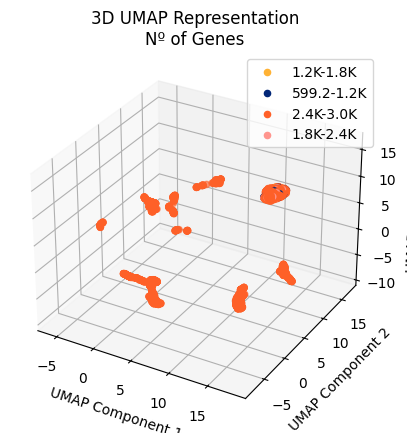

In [120]:
def format_number(n):
    """Format the number to include 'K' for thousands."""
    if n >= 1000:
        return f"{n/1000:.1f}K"
    return str(n)


def get_groups_by_counts(
    data,
    max_genes,
    n_groups=4,
):
    labels = list()
    bins = np.arange(0, max_genes + 1, max_genes / n_groups)
    formatted_bins = [format_number(bin) for bin in bins]

    for n_genes in data:
        for i, bin in enumerate(bins):
            if i == 0:
                label = f"<={formatted_bins[i]}"
            else:
                label = f"{formatted_bins[i-1]}-{formatted_bins[i]}"
            if n_genes <= bin:
                labels.append(label)
                break

    return labels


n_genes = adata_test.obs["n_genes"].to_list()
labels = get_groups_by_counts(n_groups=5, max_genes=max(n_genes), data=n_genes)
unique_labels = set(labels)

label_color_map = {
    k: v
    for k, v in zip(
        unique_labels, [irb_colors[0], irb_colors[4], irb_colors[2], irb_colors[1]]
    )
}
colors = [label_color_map.get(label, "grey") for label in labels]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with colors
ax.scatter(umap_embedding[:, 0], umap_embedding[:, 1], umap_embedding[:, 2], c=colors)

# Adding legend
for label in label_color_map:
    ax.scatter([], [], [], c=label_color_map[label], label=label)
ax.legend()

# Set labels
ax.set_xlabel("UMAP Component 1")
ax.set_ylabel("UMAP Component 2")
ax.set_zlabel("UMAP Component 3")
ax.set_title("3D UMAP Representation\nNº of Genes")

# Display the plot
# plt.savefig("outputs/umap_3d.scgpt.n_genes.png", dpi=300, bbox_inches="tight")

## Plot Distances/Similarities

In [122]:
# compute cosine similarity matrix, pdist and cdist
from scipy.spatial.distance import cosine
from scipy.spatial.distance import pdist, cdist

# cosine similarity matrix
c_matrix = cdist(scgpt_emb_test, scgpt_emb_test, "cosine")

# euclidean distance matrix
e_matrix = cdist(scgpt_emb_test, scgpt_emb_test, "euclidean")

# pearson correlation matrix
p_matrix = 1 - cdist(scgpt_emb_test, scgpt_emb_test, "correlation")

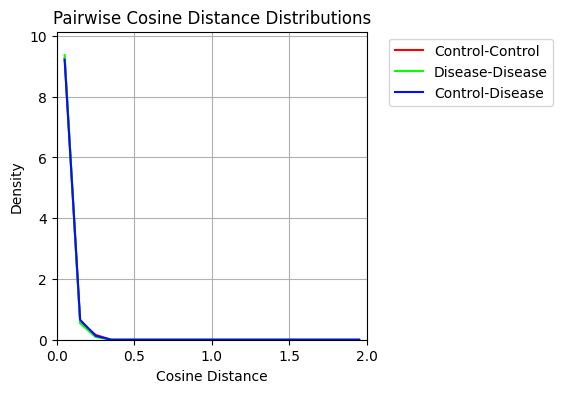

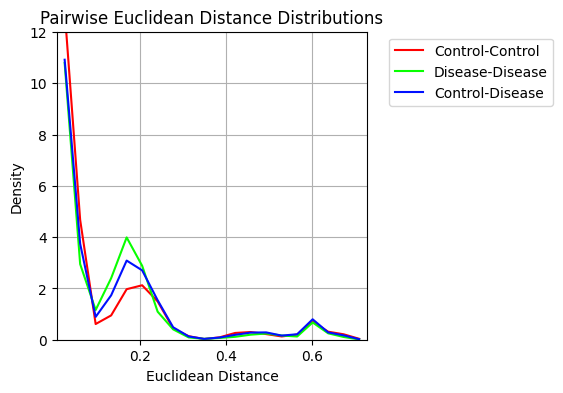

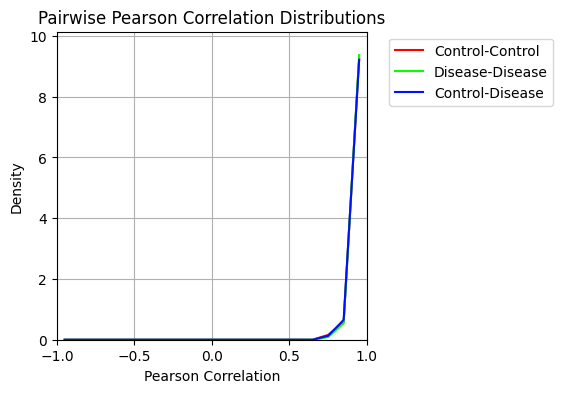

In [ ]:
# get from cosine similarity matrix the cosine similarity between ctr and dis samples
states = adata_test.obs["state"].to_list()
diseases = adata_test.obs["disease"].to_list()


c_ctr_ctr = np.array([])
c_ctr_dis = np.array([])
c_dis_dis = np.array([])

e_ctr_ctr = np.array([])
e_ctr_dis = np.array([])
e_dis_dis = np.array([])

p_ctr_ctr = np.array([])
p_ctr_dis = np.array([])
p_dis_dis = np.array([])

for disease_i in adata_test.obs["disease"].unique():
    ctr_indexes = list()
    dis_indexes = list()
    for i, (disease_j, state) in enumerate(zip(diseases, states)):
        if disease_i == disease_j and state == "Control":
            ctr_indexes.append(i)
        elif disease_i == disease_j and state == "Case":
            dis_indexes.append(i)

    # cosine
    c_ctr_ctr = np.concatenate(
        (c_ctr_ctr, get_pairwise_similarities(c_matrix, ctr_indexes))
    )

    c_ctr_dis = np.concatenate(
        (c_ctr_dis, get_pairwise_similarities(c_matrix, ctr_indexes, dis_indexes))
    )

    c_dis_dis = np.concatenate(
        (c_dis_dis, get_pairwise_similarities(c_matrix, dis_indexes))
    )

    # euclidean
    e_ctr_ctr = np.concatenate(
        (e_ctr_ctr, get_pairwise_similarities(e_matrix, ctr_indexes))
    )

    e_ctr_dis = np.concatenate(
        (e_ctr_dis, get_pairwise_similarities(e_matrix, ctr_indexes, dis_indexes))
    )

    e_dis_dis = np.concatenate(
        (e_dis_dis, get_pairwise_similarities(e_matrix, dis_indexes))
    )

    # pearson
    p_ctr_ctr = np.concatenate(
        (p_ctr_ctr, get_pairwise_similarities(p_matrix, ctr_indexes))
    )

    p_ctr_dis = np.concatenate(
        (p_ctr_dis, get_pairwise_similarities(p_matrix, ctr_indexes, dis_indexes))
    )

    p_dis_dis = np.concatenate(
        (p_dis_dis, get_pairwise_similarities(p_matrix, dis_indexes))
    )

# cosine
plot_metrics(
    [c_ctr_ctr, c_dis_dis, c_ctr_dis],
    ["Control-Control", "Disease-Disease", "Control-Disease"],
    "Cosine Distance",
    output_type="disease_control",
)

# euclidean
plot_metrics(
    [e_ctr_ctr, e_dis_dis, e_ctr_dis],
    ["Control-Control", "Disease-Disease", "Control-Disease"],
    "Euclidean Distance",
    output_type="disease_control",
)

# pearson
plot_metrics(
    [p_ctr_ctr, p_dis_dis, p_ctr_dis],
    ["Control-Control", "Disease-Disease", "Control-Disease"],
    "Pearson Correlation",
    output_type="disease_control",
)

In [123]:
adata_test.obs

,ids,celltype,celltype_id,dataset_id,batch_id,train_test,str_batch,disease_study,n_genes
4,DSA00042;GSM185821;Control,Control,1,GSE7670,93,1.0,1,Lung Adenocarcinoma,2996
9,DSA00042;GSM185831;Control,Control,1,GSE7670,93,1.0,1,Lung Adenocarcinoma,2996
22,DSA00042;GSM185857;Control,Control,1,GSE7670,93,1.0,1,Lung Adenocarcinoma,2996
23,DSA00042;GSM185859;Control,Control,1,GSE7670,93,1.0,1,Lung Adenocarcinoma,2996
27,DSA00042;GSM185867;Control,Control,1,GSE7670,93,1.0,1,Lung Adenocarcinoma,2996
...,...,...,...,...,...,...,...,...,...
10565,DSA10289;GSM782990;Case,Lung Adenocarcinoma,3,GSE31547,72,1.0,1,Lung Adenocarcinoma,2996
10575,DSA10289;GSM783000;Case,Lung Adenocarcinoma,3,GSE31547,72,1.0,1,Lung Adenocarcinoma,2996
10576,DSA10289;GSM783001;Case,Lung Adenocarcinoma,3,GSE31547,72,1.0,1,Lung Adenocarcinoma,2996
10581,DSA10289;GSM783006;Case,Lung Adenocarcinoma,3,GSE31547,72,1.0,1,Lung Adenocarcinoma,2996


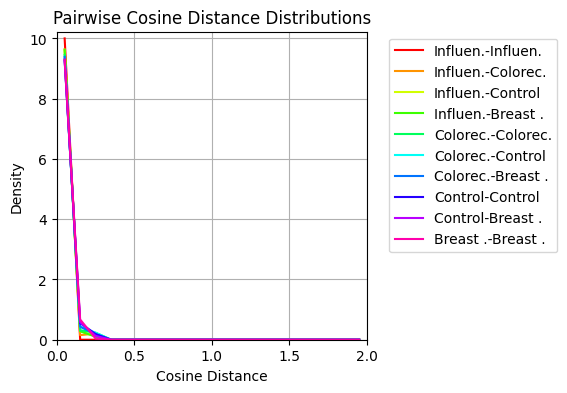

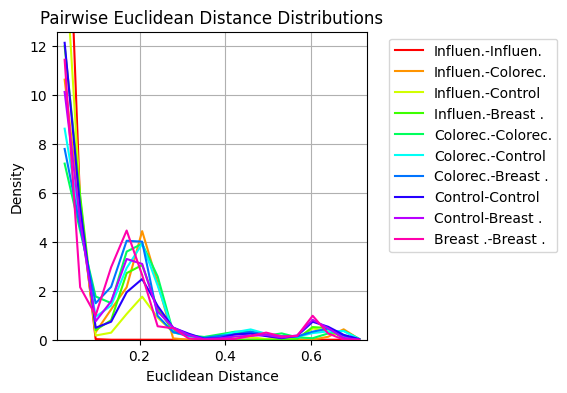

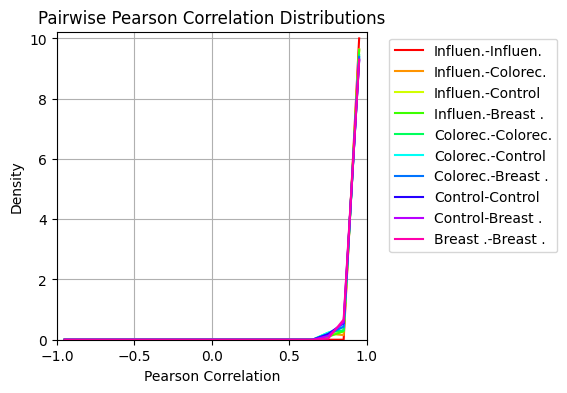

In [ ]:
def format_string(s):
    if len(s) > 8:
        return s[:7] + "."
    return s


diseases = raw_data.obs["disease"].to_list()
states = raw_data.obs["state"].to_list()

disease_labels = [x if y == "Case" else y for x, y in zip(diseases, states)]


idxs = list()
diseases = list(set(disease_labels))
n_diseases = len(diseases)

# get idxs for each disease
for disease in diseases:
    # idxs.append(
    #     [
    #         i
    #         for i, label in enumerate(disease_labels)
    #         if (label == disease) & (states[i] == "Case")
    #     ]
    # )

    idxs.append([i for i, label in enumerate(disease_labels) if label == disease])

labels = list()
values = list()
for i in range(n_diseases):

    for j in range(i, n_diseases):
        labels.append(f"{format_string(diseases[i])}-{format_string(diseases[j])}")
        if i == j:
            values.append(get_pairwise_similarities(c_matrix, idxs[i]))
        else:
            values.append(get_pairwise_similarities(c_matrix, idxs[i], idxs[j]))

plot_metrics(values, labels, "Cosine Distance", output_type="diseases")


labels = list()
values = list()
for i in range(n_diseases):

    for j in range(i, n_diseases):
        labels.append(f"{format_string(diseases[i])}-{format_string(diseases[j])}")
        if i == j:
            values.append(get_pairwise_similarities(e_matrix, idxs[i]))
        else:
            values.append(get_pairwise_similarities(e_matrix, idxs[i], idxs[j]))

plot_metrics(values, labels, "Euclidean Distance", output_type="diseases")


labels = list()
values = list()
for i in range(n_diseases):

    for j in range(i, n_diseases):
        labels.append(f"{format_string(diseases[i])}-{format_string(diseases[j])}")
        if i == j:
            values.append(get_pairwise_similarities(p_matrix, idxs[i]))
        else:
            values.append(get_pairwise_similarities(p_matrix, idxs[i], idxs[j]))

plot_metrics(values, labels, "Pearson Correlation", output_type="diseases")

['9.8K-14.8K', '9.8K-14.8K', '9.8K-14.8K', '9.8K-14.8K', '9.8K-14.8K', '9.8K-14.8K', '9.8K-14.8K', '9.8K-14.8K', '9.8K-14.8K', '9.8K-14.8K']


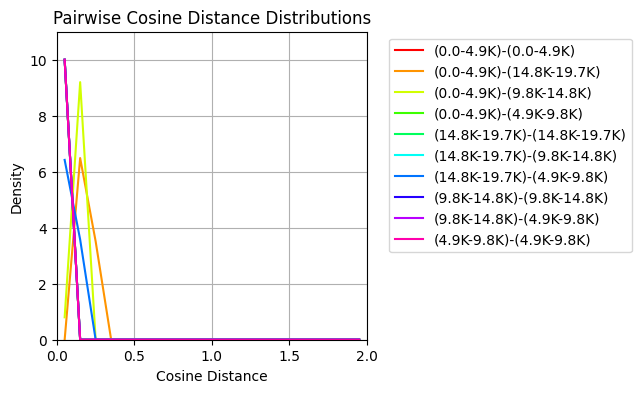

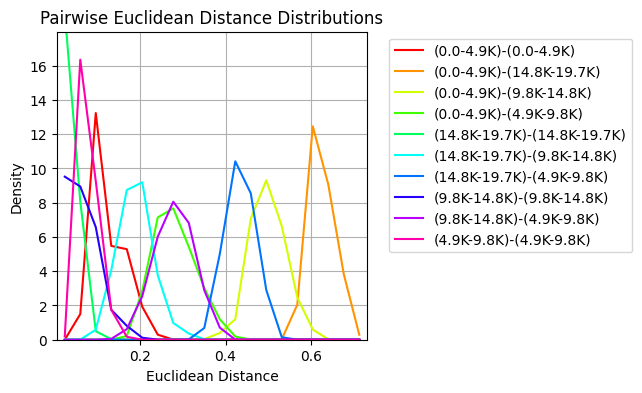

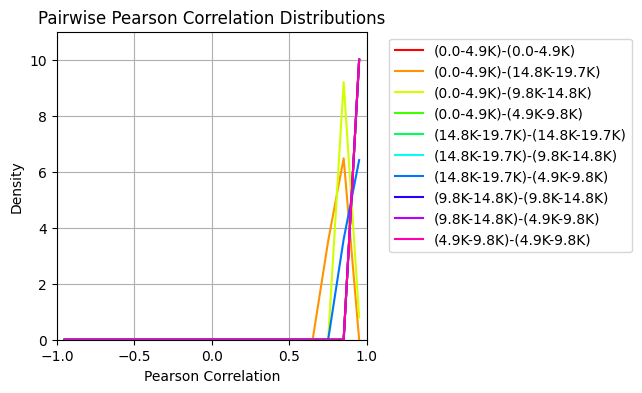

In [ ]:
def format_number(n):
    """Format the number to include 'K' for thousands."""
    if n >= 1000:
        return f"{n/1000:.1f}K"
    return str(n)


def get_groups_by_counts(data, n_groups=4):
    labels = list()
    bins = np.arange(0, 19690 + 1, 19690 / n_groups)
    formatted_bins = [format_number(bin) for bin in bins]

    for n_genes in data:
        for i, bin in enumerate(bins):
            if i == 0:
                label = f"<={formatted_bins[i]}"
            else:
                label = f"{formatted_bins[i-1]}-{formatted_bins[i]}"
            if n_genes <= bin:
                labels.append(label)
                break

    return labels


n_genes = raw_data.obs["n_genes"].to_list()
n_genes_labels = get_groups_by_counts(n_groups=4, data=n_genes)


print(n_genes_labels[:10])

idxs = list()
unique_labels = list(set(n_genes_labels))
n_labels = len(unique_labels)

# get idxs for each disease
for label in unique_labels:
    idxs.append([i for i, l in enumerate(n_genes_labels) if l == label])

labels = list()
values = list()
for i in range(n_labels):
    for j in range(i, n_labels):
        labels.append(f"({unique_labels[i]})-({unique_labels[j]})")
        if i == j:
            values.append(get_pairwise_similarities(c_matrix, idxs[i]))
        else:
            values.append(get_pairwise_similarities(c_matrix, idxs[i], idxs[j]))

plot_metrics(values, labels, "Cosine Distance", output_type="n_genes_labels")


labels = list()
values = list()
for i in range(n_labels):

    for j in range(i, n_labels):
        labels.append(f"({unique_labels[i]})-({unique_labels[j]})")
        if i == j:
            values.append(get_pairwise_similarities(e_matrix, idxs[i]))
        else:
            values.append(get_pairwise_similarities(e_matrix, idxs[i], idxs[j]))

plot_metrics(values, labels, "Euclidean Distance", output_type="n_genes_labels")


labels = list()
values = list()
for i in range(n_labels):

    for j in range(i, n_labels):
        labels.append(f"({unique_labels[i]})-({unique_labels[j]})")
        if i == j:
            values.append(get_pairwise_similarities(p_matrix, idxs[i]))
        else:
            values.append(get_pairwise_similarities(p_matrix, idxs[i], idxs[j]))

plot_metrics(values, labels, "Pearson Correlation", output_type="n_genes_labels")

In [ ]:
n_groups = 4
bins = np.arange(0, 19690 + 1, 19690 / n_groups)
formatted_bins = [format_number(bin) for bin in bins]

In [ ]:
formatted_bins

['0.0', '4.9K', '9.8K', '14.8K', '19.7K']

## MLP Prediction


In [44]:
"""MLP Prediction

Structure:  
    1. Imports, Variables, Functions
    2. Define Splits
    3. Train MLP
    4. Evaluate MLP

"""

# 1. Imports, Variables, Functions
# imports
import random
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# variables


# functions

# 2. Process Data
logging.info(f"Unfiltered shape: {raw_data.X.shape}")

# clean unknown values
mask_unknown = [
    False if x.split(";")[2] == "Unknown" else True for x in raw_data.obs["ids"].values
]

adata_clean = raw_data[mask_unknown]

embeddings = raw_data[mask_unknown]

embeddings.X[np.isnan(embeddings.X)] = 0

# embeddings = scgpt_embed[mask_unknown]


assert adata_clean.X.shape[0] == embeddings.X.shape[0]

logging.info(f"Filter Unknown values shape: {adata_clean.X.shape}")

# generate celltype and celltype_id columns in adata_clean.obs
disease_types = raw_data.obs["disease"].to_list()
states = raw_data.obs["state"].to_list()
disease_types_controls = [
    x if y == "Case" else y for x, y in zip(disease_types, states)
]
disease_type_2_id = {k: v for v, k in enumerate(set(disease_types_controls))}

disease_ids = [disease_type_2_id[x] for x in disease_types_controls]
del disease_type_2_id

adata_clean.obs["celltype"] = disease_types_controls

adata_clean.obs["celltype_id"] = disease_ids

logging.info(f"Counts of each disease type: {Counter(disease_types)}")


# generate dataset ids column in adata_clean.obs
dataset_ids = raw_data.obs["dataset"].to_list()
dataset_2_batch_id = {k: v for v, k in enumerate(set(dataset_ids))}
batch_ids = [dataset_2_batch_id[x] for x in dataset_ids]
del dataset_2_batch_id

adata_clean.obs["dataset_id"] = dataset_ids
adata_clean.obs["batch_id"] = batch_ids

logging.info(f"Counts of each dataset id: {Counter(dataset_ids)}")


# 3. Define Splits
# We combine both the disease type with the dataset as to
# shuffle even more the data - minimize bias in train/test split
labels = np.array([a + b for a, b in zip(disease_types, dataset_ids)])

# Generate indices for the data points
indices = np.arange(len(labels))

"""train_test_split cannot handle single label indexes

Because of this we will manually deal with these cases!

"""
indices_single_label = [i for i, x in enumerate(labels) if list(labels).count(x) == 1]
labels_single_label = labels[indices_single_label]

logging.info(f"Nº of single label indexes: {len(indices_single_label)}")


remaining_indices = [i for i in indices if i not in indices_single_label]
remaining_labels = labels[remaining_indices]

# Perform stratified split on the remaining indices
train_indices, test_indices = train_test_split(
    remaining_indices, test_size=0.3, stratify=remaining_labels, random_state=42
)

for idx in indices_single_label:

    if random.random() < 0.2:
        test_indices.append(idx)
    else:
        train_indices.append(idx)


test_indices.sort()
train_indices.sort()

batch_ids = np.zeros(len(labels))
batch_ids[test_indices] = 1


logging.info(f"Nº of train samples: {np.sum(~batch_ids.astype(bool))}")
logging.info(f"Nº of test samples: {np.sum(batch_ids.astype(bool))}")


adata_clean.obs["train_test"] = batch_ids
adata_clean.obs["str_batch"] = batch_ids.astype(int).astype(str)

INFO:root:Unfiltered shape: (5090, 19690)
/tmp/ipykernel_4672/414171329.py:37: ImplicitModificationWarning: Trying to modify attribute `.X` of view, initializing view as actual.
  embeddings.X[np.isnan(embeddings.X)] = 0
INFO:root:Filter Unknown values shape: (5090, 19690)
/tmp/ipykernel_4672/414171329.py:57: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_clean.obs["celltype"] = disease_types_controls
INFO:root:Counts of each disease type: Counter({'Breast Cancer': 2355, 'Colorectal Carcinoma': 1814, 'Influenza': 921})
INFO:root:Counts of each dataset id: Counter({'GSE54002': 431, 'GSE87211': 361, 'GSE41258': 321, 'GSE55276': 234, 'GSE55277': 234, 'GSE5364': 194, 'GSE45827': 162, 'GSE101702': 157, 'GSE27562': 146, 'GSE24124': 135, 'GSE47756': 127, 'GSE16443': 119, 'GSE42568': 119, 'GSE164191': 119, 'GSE29044': 107, 'GSE37751': 106, 'GSE33113': 94, 'GSE123086': 92, 'GSE9348': 80, 'GSE62932': 79, 'GSE29366': 67, 'GSE29431': 64

In [45]:
import sklearn

# define train test adata
adata_train = adata_clean[adata_clean.obs["str_batch"] == "0"]
adata_test = adata_clean[adata_clean.obs["str_batch"] == "1"]

embeddings_train = embeddings[adata_clean.obs["str_batch"] == "0"]
embeddings_test = embeddings[adata_clean.obs["str_batch"] == "1"]

assert adata_train.X.shape[0] == embeddings_train.X.shape[0]
assert adata_test.X.shape[0] == embeddings_test.X.shape[0]

logging.info(f"train shape: {embeddings_train.shape}")
logging.info(f"test shape: {embeddings_test.shape}")

# 3. Train MLP
X_train = embeddings_train.X
# X_train = np.where(np.isnan(adata_train.X), 0, adata_train.X)

y_train = adata_train.obs["celltype"].values


# Create and train the model
mlp = MLPClassifier(
    hidden_layer_sizes=(384, 256, 128, 64),  # Four hidden layers with varying sizes
    activation="relu",  # Activation function for the hidden layers
    solver="adam",  # Optimizer
    max_iter=500,  # Maximum number of iterations
    random_state=42,  # For reproducibility
)
mlp.fit(X_train, y_train)


# 4. Evaluate MLP
X_test = embeddings_test.X
# X_test = np.where(np.isnan(adata_test.X), 0, adata_test.X)
y_test = adata_test.obs["celltype"].values

# Predict
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

sklearn.metrics.f1_score(y_test, y_pred, average="weighted")


print("Predicted labels:", y_pred)
print("Accuracy:", accuracy)

INFO:root:train shape: (3563, 19690)
INFO:root:test shape: (1527, 19690)


Predicted labels: ['Control' 'Control' 'Control' ... 'Colorectal Carcinoma'
 'Colorectal Carcinoma' 'Colorectal Carcinoma']
Accuracy: 0.7210216110019646


In [46]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

report = classification_report(y_test, y_pred, output_dict=True)

print(report)

{'Breast Cancer': {'precision': 0.7337461300309598, 'recall': 0.9330708661417323, 'f1-score': 0.8214904679376083, 'support': 508.0}, 'Colorectal Carcinoma': {'precision': 0.8440366972477065, 'recall': 0.8046647230320699, 'f1-score': 0.8238805970149253, 'support': 343.0}, 'Control': {'precision': 0.7905405405405406, 'recall': 0.430939226519337, 'f1-score': 0.5578069129916567, 'support': 543.0}, 'Influenza': {'precision': 0.45348837209302323, 'recall': 0.8796992481203008, 'f1-score': 0.59846547314578, 'support': 133.0}, 'accuracy': 0.7210216110019646, 'macro avg': {'precision': 0.7054529349780575, 'recall': 0.76209351595336, 'f1-score': 0.7004108627724925, 'support': 1527.0}, 'weighted avg': {'precision': 0.7543058861909473, 'recall': 0.7210216110019646, 'f1-score': 0.7088364532883318, 'support': 1527.0}}


In [47]:
report_df = pd.DataFrame(report).transpose()
# Drop non-label rows (accuracy, macro avg, weighted avg)
report_df.drop(index=["accuracy", "macro avg", "weighted avg"], inplace=True)
report_df.drop(columns=["support"], inplace=True)

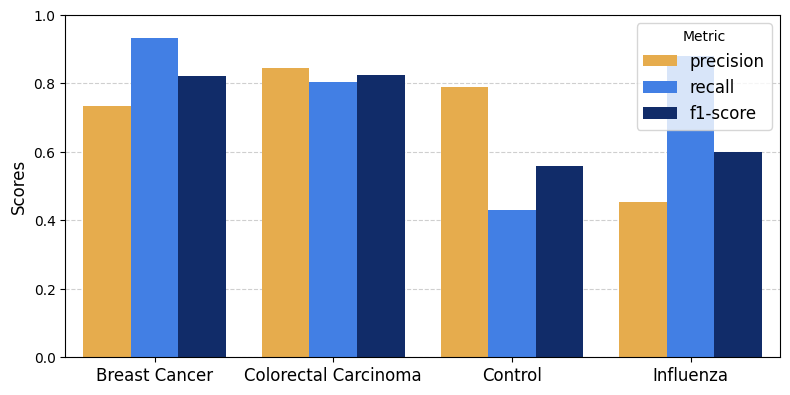

In [48]:
import seaborn as sns


# Creating the dataframe in a long format for seaborn
df_long = report_df.reset_index().melt(
    id_vars="index", var_name="Metric", value_name="Score"
)
df_long.columns = ["Condition", "Metric", "Score"]

custom_palette = {
    "precision": irb_colors[0],  # Blue
    "recall": irb_colors[3],  # Orange
    "f1-score": irb_colors[4],  # Green
}

# Plotting with seaborn
plt.figure(figsize=(8, 4))
sns.barplot(
    x="Condition",
    y="Score",
    hue="Metric",
    data=df_long,
    palette=custom_palette,
    zorder=2,
)

plt.grid(axis="y", linestyle="--", alpha=0.6, zorder=-3)

# Adding labels and title
plt.xlabel("")
plt.ylabel("Scores", fontsize=12)
plt.title("")

plt.legend(title="Metric", loc="upper right", fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.ylim(0, 1)

plt.savefig(
    "outputs/classification_report_metrics_vertical.raw.png",
    dpi=300,
    bbox_inches="tight",
)


plt.show()

In [ ]:
sklearn.metrics.f1_score(y_test, y_pred, average="weighted")

0.4291957647416352

/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


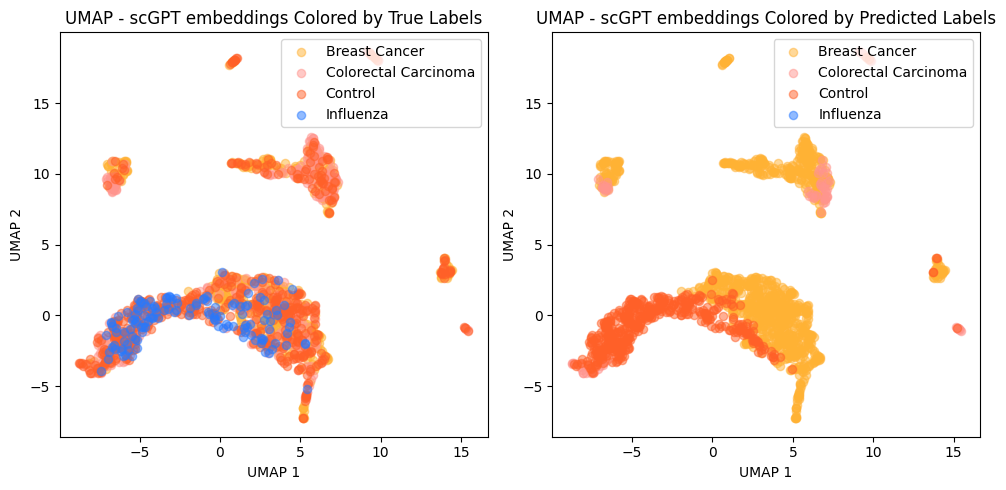

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your labels and corresponding colors
labels = np.unique(y_test)

# Create UMAP embeddings
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=42)
X_test_umap = reducer.fit_transform(X_test)


color_map = {label: color for label, color in zip(labels, irb_colors)}

# Plotting the UMAP results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# UMAP colored by true labels
for label in labels:
    idx = y_test == label
    axes[0].scatter(
        X_test_umap[idx, 0],
        X_test_umap[idx, 1],
        c=color_map[label],
        label=label,
        s=35,
        alpha=0.5,
    )
axes[0].set_title("UMAP - scGPT embeddings Colored by True Labels")
axes[0].legend()
axes[0].set_xlabel("UMAP 1")
axes[0].set_ylabel("UMAP 2")

# UMAP colored by predicted labels
for label in labels:
    idx = y_pred == label
    axes[1].scatter(
        X_test_umap[idx, 0],
        X_test_umap[idx, 1],
        c=color_map[label],
        label=label,
        s=35,
        alpha=0.5,
    )
axes[1].set_title("UMAP - scGPT embeddings Colored by Predicted Labels")
axes[1].legend()
axes[1].set_xlabel("UMAP 1")
axes[1].set_ylabel("UMAP 2")

plt.tight_layout()
plt.savefig("outputs/umap_raw_data_pred_labels.scgpt.png", dpi=300, bbox_inches="tight")

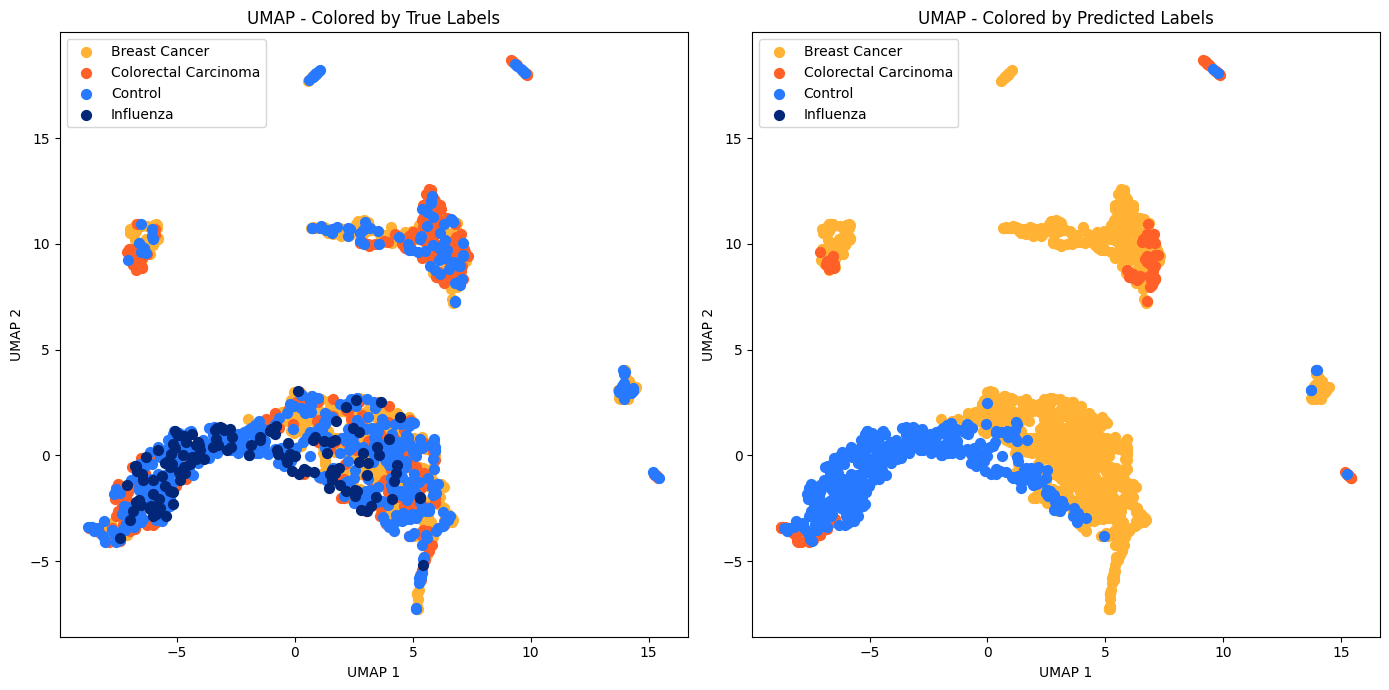

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your labels and corresponding colors
labels = np.unique(y_test)


color_map = {
    label: color for label, color in zip(labels, irb_colors[:1] + irb_colors[2:])
}

# Plotting the UMAP results
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# UMAP colored by true labels
for label in labels:
    idx = y_test == label
    axes[0].scatter(
        X_test_umap[idx, 0], X_test_umap[idx, 1], c=color_map[label], label=label, s=50
    )
axes[0].set_title("UMAP - Colored by True Labels")
axes[0].legend()
axes[0].set_xlabel("UMAP 1")
axes[0].set_ylabel("UMAP 2")

# UMAP colored by predicted labels
for label in labels:
    idx = y_pred == label
    axes[1].scatter(
        X_test_umap[idx, 0], X_test_umap[idx, 1], c=color_map[label], label=label, s=50
    )
axes[1].set_title("UMAP - Colored by Predicted Labels")
axes[1].legend()
axes[1].set_xlabel("UMAP 1")
axes[1].set_ylabel("UMAP 2")

plt.tight_layout()
plt.savefig(
    "outputs/umap.scgpt_embed.pred_labels.raw.png", dpi=300, bbox_inches="tight"
)